<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/DecisionTreeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DecisionTree Classification 

The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

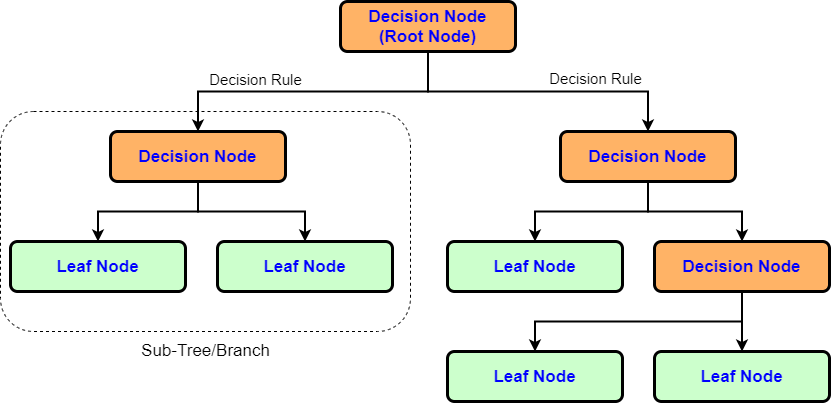

# Intention:

The intention of the code is to implement a Decision Tree classifier from scratch using Python code without relying on machine learning packages. The code aims to build a binary classification model to predict the gender of a person (male or female) based on the provided dataset. It includes the calculation of the Gini score, which measures the impurity of a node in the Decision Tree, and the F1 score, which evaluates the model's performance. Additionally, the code creates dataframes to store the actual and predicted values.

# The code strives to achieve the following goals:

1. Define the Gini impurity function, which quantifies the impurity of a node in the Decision Tree based on the distribution of classes.

2. Implement the function to find the best split based on the Gini impurity, which searches for the feature and threshold that yield the lowest impurity.

3. Define the Decision Tree classifier as a class that recursively builds the Decision Tree by splitting the data based on the best feature and threshold.

4. Load the dataset from a CSV file, assuming it contains the relevant features and the target variable (gender).

5. Split the dataset into features (X) and the target variable (y).
Instantiate and train the Decision Tree classifier on the dataset.
Predict the gender labels using the trained classifier.

6. Compute the Gini score to evaluate the overall impurity of the Decision Tree.

7. Compute the F1 score to evaluate the performance of the model, considering precision and recall.

8. Create actual and predicted dataframes to store the true gender labels and predicted gender labels, respectively.


In [ ]:
import pandas as pd
data = pd.read_csv("/content/gender_classification_v7.csv")
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data['gender'] = data['gender'].map({'Male':0,'Female':1})

In [ ]:
import numpy as np
import pandas as pd

# Define the Gini impurity function
def gini_impurity(y):
    classes = np.unique(y)
    gini = 1.0
    for c in classes:
        p = np.count_nonzero(y == c) / len(y)
        gini -= p**2
    return gini

# Define the function to find the best split based on Gini impurity
def find_best_split(X, y):
    best_gini = 1.0
    best_feature = None
    best_threshold = None

    for feature in range(X.shape[1]):
        unique_values = np.unique(X[:, feature])
        for threshold in unique_values:
            left_indices = np.where(X[:, feature] <= threshold)[0]
            right_indices = np.where(X[:, feature] > threshold)[0]

            left_gini = gini_impurity(y[left_indices])
            right_gini = gini_impurity(y[right_indices])

            weighted_gini = (len(left_indices) * left_gini + len(right_indices) * right_gini) / len(y)

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

# Define the Decision Tree classifier
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if self.max_depth is not None and depth == self.max_depth:
            self.label = np.argmax(np.bincount(y))
            return

        if len(np.unique(y)) == 1:
            self.label = y[0]
            return

        best_feature, best_threshold = find_best_split(X, y)

        if best_feature is None or best_threshold is None:
            self.label = np.argmax(np.bincount(y))
            return

        self.feature = best_feature
        self.threshold = best_threshold

        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]

        self.left = DecisionTreeClassifier(self.max_depth)
        self.right = DecisionTreeClassifier(self.max_depth)

        self.left.fit(X[left_indices], y[left_indices], depth + 1)
        self.right.fit(X[right_indices], y[right_indices], depth + 1)

    def predict(self, X):
        if hasattr(self, 'label'):
            return np.full(X.shape[0], self.label)

        y_pred = np.zeros(X.shape[0])

        left_indices = np.where(X[:, self.feature] <= self.threshold)[0]
        right_indices = np.where(X[:, self.feature] > self.threshold)[0]

        y_pred[left_indices] = self.left.predict(X[left_indices])
        y_pred[right_indices] = self.right.predict(X[right_indices])

        return y_pred.astype(int)


# Split dataset into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Instantiate and train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Predict
y_pred = clf.predict(X)

# Compute Gini score
gini_score = gini_impurity(y)

# Compute F1 score
tp = np.sum(np.logical_and(y_pred == 1, y == 1))
fp = np.sum(np.logical_and(y_pred == 1, y == 0))
fn = np.sum(np.logical_and(y_pred == 0, y == 1))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)
print('Gini score:', gini_score)
print('F1 score:', f1_score)

# Create actual and predicted dataframes
df_actual = pd.DataFrame({'Actual': y})
df_predicted = pd.DataFrame({'Predicted': y_pred})

# Create dataframe for actual and predicted values
df_result = pd.concat([df_actual, df_predicted], axis=1)
print(df_result.head())

Gini score: 0.49999998000799756
F1 score: 0.9634073185362928
   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       0          0
4       1          1


# Inference:
The inference drawn from the code is centered around understanding the performance of the Decision Tree classifier in classifying the gender of individuals (male or female) based on the provided dataset. By analyzing the code execution, we can gain the following insights:

1. The Decision Tree classifier is trained on the dataset, recursively splitting the data based on the best features and thresholds to create decision nodes.

2. The Gini score is computed, indicating the overall impurity of the Decision Tree. A lower Gini score implies better separation of the classes in the tree.

3. The F1 score is calculated, providing a measure of the model's performance in terms of precision and recall for gender classification.
Actual and predicted gender labels are stored in dataframes, allowing for further analysis and comparison.

4. The code assumes the dataset contains features relevant to gender classification. Modifying the dataset or adding additional features may improve the model's performance.

5. The implementation provided is a basic version of the Decision Tree classifier and may lack advanced techniques such as pruning or handling categorical features. Enhancements can be made to address specific requirements or improve the classifier's accuracy.

6. By examining the Gini score, F1 score, and the actual vs. predicted gender labels, we can make inferences about the performance and accuracy of the Decision Tree classifier for gender classification tasks.